# PCA

In [1]:
import pandas as pd
import scipy.stats
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

## Part1: Data preparation

In [2]:
# Read the data from the file
# Data from https://www.kaggle.com/rohan0301/unsupervised-learning-on-country-data?select=Country-data.csv
import requests
excel_url = 'https://docs.google.com/spreadsheets/d/1YJg3Idp2Z7uo85yuGXpebkQSbNDFns2IiHOZYg31Vvc/export?format=xlsx'
response = requests.get(excel_url)
response.raise_for_status()  # Ensure the request was successful
with open('sheet.xlsx', 'wb') as file:
    file.write(response.content)
df = pd.read_excel('sheet.xlsx')

In [3]:
# Check the first few lines to see the column names and type of content
df.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
# Size of the dataframe
len(df)

167

In [5]:
# Remove rows with empty values
df = df.replace(r'^\s*$', float('NaN'), regex = True)
df.dropna(inplace = True)
len(df)

167

In [6]:
# Let us check the types of the different columns
df.dtypes

,0
country,object
child_mort,float64
exports,float64
health,float64
imports,float64
income,int64
inflation,float64
life_expec,float64
total_fer,float64
gdpp,int64


In [7]:
# Let us adapt the dataframe (remove IDs, and make sure that columns have the right type)
df['income'] = df['income'].astype(float)
df['gdpp'] = df['gdpp'].astype(float)

## Part 2: Data exploration

In [8]:
# Lets see the summary of the numerical columns
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


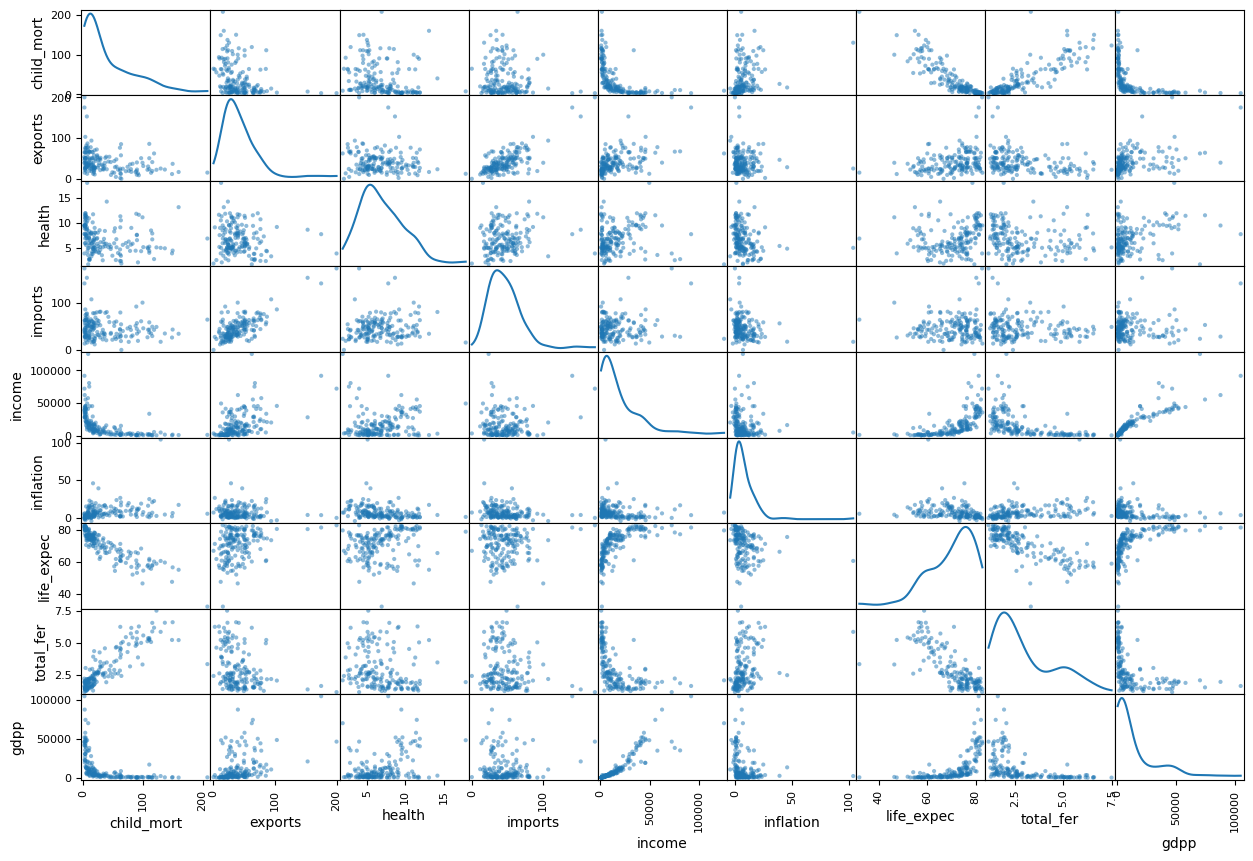

In [9]:
# Matrix scatter plot
fig = pd.plotting.scatter_matrix(df, diagonal='kde', figsize=(15,10));

In [11]:
# Let us explore the correlation matrix
corrMatrix = df.corr(numeric_only=True)
print (corrMatrix)

            child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -0.159048  0.115498  

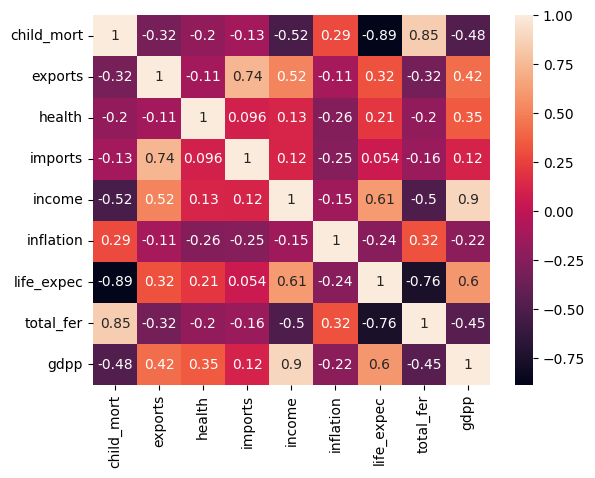

In [12]:
sns.heatmap(corrMatrix, annot=True)
plt.show()

In [13]:
# Mean of each variable
df.iloc[:,1:-1].mean(axis=0)

,0
child_mort,38.270060
exports,41.108976
health,6.815689
imports,46.890215
income,17144.688623
inflation,7.781832
life_expec,70.555689
total_fer,2.947964


In [14]:
# Standard deviation of each variable
df.iloc[:,1:-1].std(axis=0)

,0
child_mort,40.328931
exports,27.412010
health,2.746837
imports,24.209589
income,19278.067698
inflation,10.570704
life_expec,8.893172
total_fer,1.513848


## PCA

Principal Component Analysis is one of those tools that do not imply pairs (X,y), but only a collection of {x}.

In [15]:
# Construct the PCA model
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

X=df.iloc[:,1:-1]
pca_pipe = make_pipeline(StandardScaler(), PCA()) # Scale, then PCA
pca_pipe.fit(X)

model = pca_pipe.named_steps['pca'] # Extract from the pipe the PCA model

In [16]:
# Let us see the principal directions
pd.DataFrame(
    data    = model.components_,
    columns = X.columns,
    index   = ['PC%d'%(i+1) for i in range(len(X.columns))]
)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer
PC1,-0.472880,0.308396,0.144568,0.194640,0.386787,-0.220475,0.464191,-0.456952
PC2,0.214124,0.608374,-0.241608,0.661131,0.031207,0.005771,-0.237343,0.176702
PC3,-0.099988,0.146037,-0.647403,-0.285257,0.247776,0.615777,0.158082,-0.051085
PC4,0.115187,0.101508,0.680156,0.056361,0.315029,0.621292,0.003857,0.159304
PC5,0.297170,0.057511,-0.058959,-0.315368,0.728256,-0.417865,-0.091366,0.303536
PC6,0.203321,-0.053447,0.013921,-0.036543,0.178963,0.063577,-0.600435,-0.746781
PC7,-0.135133,-0.696419,-0.182673,0.569245,0.351358,0.086150,-0.020344,0.089684
PC8,-0.747904,0.109448,0.044089,-0.125062,0.054303,-0.009900,-0.577846,0.272258


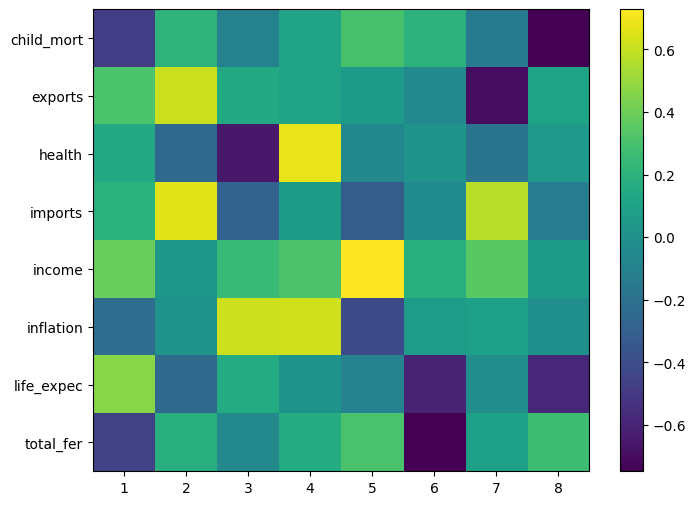

In [17]:
# And now visually
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(8, 6))
components = model.components_
plt.imshow(components.T, cmap='viridis', aspect='auto')
plt.yticks(range(len(X.columns)), X.columns)
plt.xticks(range(len(X.columns)), np.arange(model.n_components_) + 1)
plt.grid(False)
plt.colorbar();

In [21]:
model.components_.shape

(8, 8)

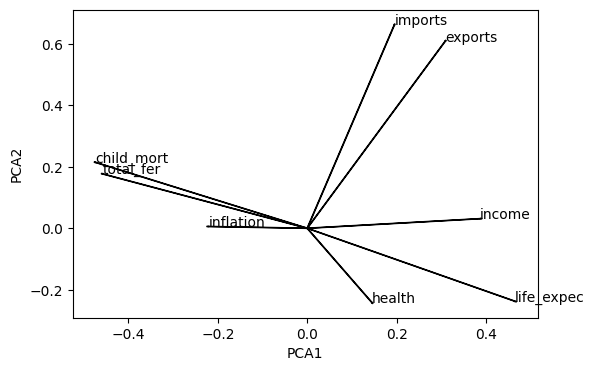

In [22]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
for i in range(model.components_.shape[1]):
    plt.arrow(0,0,model.components_[0,i],model.components_[1,i])
    plt.text(model.components_[0,i], model.components_[1,i], X.columns[i])
ax.set_xlabel('PCA1');
ax.set_ylabel('PCA2');
plt.show()

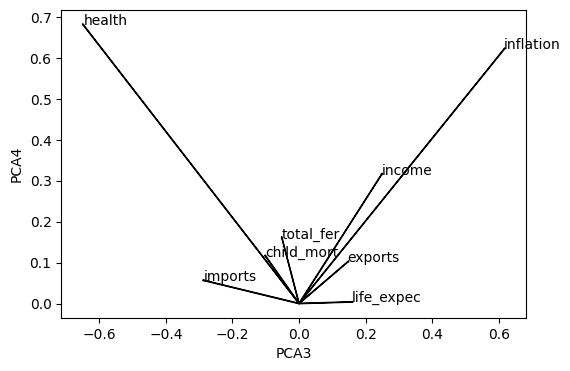

In [23]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
for i in range(model.components_.shape[1]):
    plt.arrow(0,0,model.components_[2,i],model.components_[3,i])
    plt.text(model.components_[2,i], model.components_[3,i], X.columns[i])
ax.set_xlabel('PCA3');
ax.set_ylabel('PCA4');
plt.show()

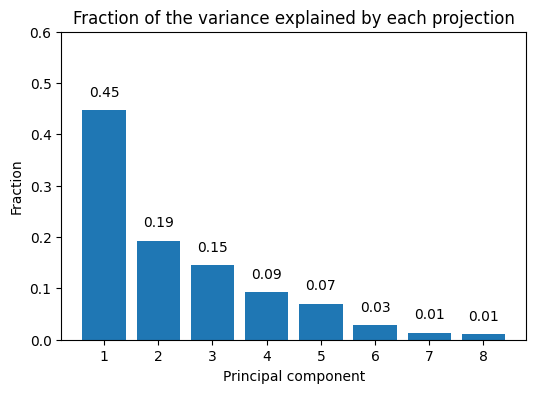

In [24]:
# Fraction of the explained variance
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.bar(
    x      = np.arange(model.n_components_) + 1,
    height = model.explained_variance_ratio_
)

for x, y in zip(np.arange(len(X.columns)) + 1, model.explained_variance_ratio_):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_xticks(np.arange(model.n_components_) + 1)
ax.set_ylim(0, 0.6)
ax.set_title('Fraction of the variance explained by each projection')
ax.set_xlabel('Principal component')
ax.set_ylabel('Fraction');

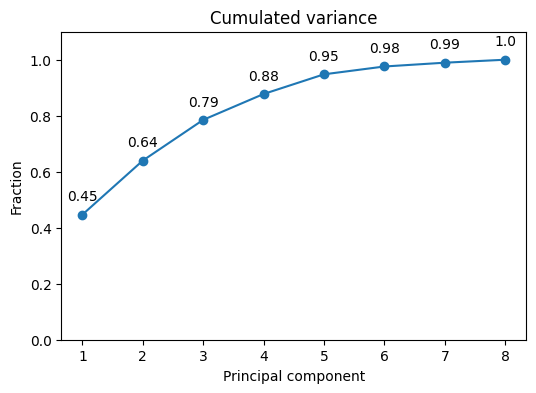

In [25]:
# Cumulated variance
varianceSum = model.explained_variance_ratio_.cumsum()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6, 4))
ax.plot(
    np.arange(len(X.columns)) + 1,
    varianceSum,
    marker = 'o'
)

for x, y in zip(np.arange(len(X.columns)) + 1, varianceSum):
    label = round(y, 2)
    ax.annotate(
        label,
        (x,y),
        textcoords="offset points",
        xytext=(0,10),
        ha='center'
    )

ax.set_ylim(0, 1.1)
ax.set_xticks(np.arange(model.n_components_) + 1)
ax.set_title('Cumulated variance')
ax.set_xlabel('Principal component')
ax.set_ylabel('Fraction');

In [26]:
# Let us now project all countries in the different components
scaler = StandardScaler()
scaler.fit(X)
Xnorm = scaler.transform(X)
Xnew = model.fit_transform(Xnorm)

Text(1.7511757341818441, -1.7893169796003296, 'Spain')

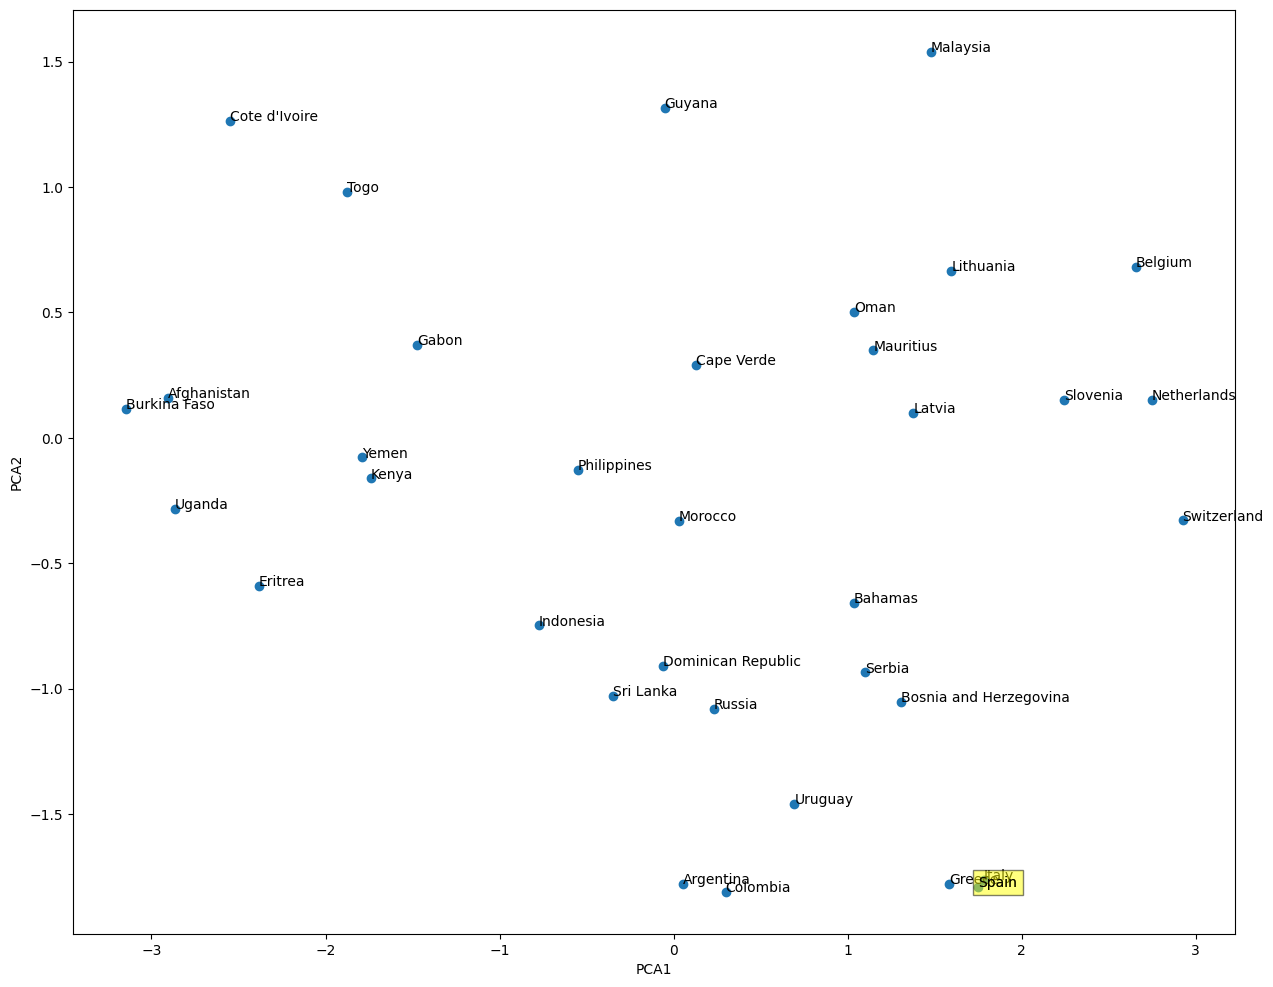

In [27]:
# Let us explore PCA1-PCA2
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
iSpain = df.index[df['country'] == "Spain"].tolist()[0]
idx = [i for i in range(0,Xnew.shape[0],5)]+[iSpain]
axs.scatter(Xnew[idx,0],Xnew[idx,1])
axs.set_xlabel('PCA1')
axs.set_ylabel('PCA2')
for i in idx:
    plt.text(Xnew[i,0],Xnew[i,1],df.country[i])

plt.text(Xnew[iSpain,0],Xnew[iSpain,1],df.country[iSpain], bbox=dict(facecolor='yellow',alpha=0.5))

Text(-0.39599328563367775, 0.11371705564727598, 'Spain')

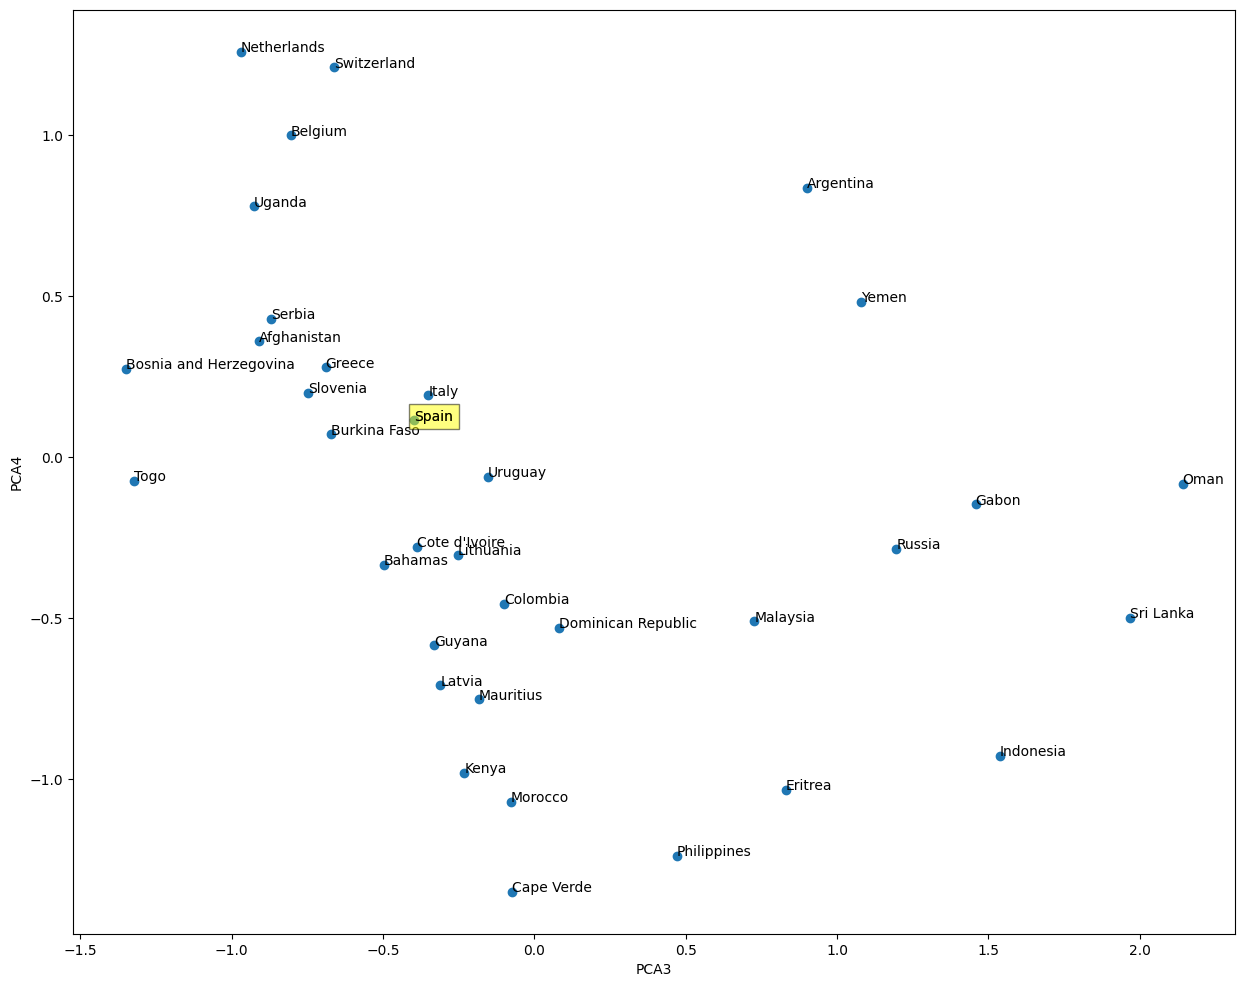

In [28]:
# Let us explore PCA1-PCA2
fig, axs = plt.subplots(nrows=1, ncols=1, figsize=(15, 12))
axs.scatter(Xnew[idx,2],Xnew[idx,3])
axs.set_xlabel('PCA3')
axs.set_ylabel('PCA4')
for i in idx:
    plt.text(Xnew[i,2],Xnew[i,3],df.country[i])

plt.text(Xnew[iSpain,2],Xnew[iSpain,3],df.country[iSpain], bbox=dict(facecolor='yellow',alpha=0.5))